In [56]:
import cv2
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
import random

In [57]:
path = "input/FER"

faceFiles = [
    *glob.glob(f"../{path}/train/**/*.jpg")
]
faceFiles

['../input/FER/train/happy/S085_002_00000013.jpg',
 '../input/FER/train/happy/S011_006_00000013.jpg',
 '../input/FER/train/happy/S060_002_00000025.jpg',
 '../input/FER/train/happy/S137_011_00000020.jpg',
 '../input/FER/train/happy/S037_006_00000020.jpg',
 '../input/FER/train/happy/S124_007_00000024.jpg',
 '../input/FER/train/happy/S037_006_00000021.jpg',
 '../input/FER/train/happy/S116_007_00000015.jpg',
 '../input/FER/train/happy/S060_002_00000024.jpg',
 '../input/FER/train/happy/S011_006_00000012.jpg',
 '../input/FER/train/happy/S085_002_00000012.jpg',
 '../input/FER/train/happy/S109_006_00000013.jpg',
 '../input/FER/train/happy/S092_004_00000023.jpg',
 '../input/FER/train/happy/S060_002_00000026.jpg',
 '../input/FER/train/happy/S064_003_00000025.jpg',
 '../input/FER/train/happy/S089_002_00000021.jpg',
 '../input/FER/train/happy/S095_007_00000019.jpg',
 '../input/FER/train/happy/S134_004_00000014.jpg',
 '../input/FER/train/happy/S116_007_00000017.jpg',
 '../input/FER/train/happy/S068

In [58]:
print(len(faceFiles))

981


In [59]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [60]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["mood","photo"])
display(faces_df)

,mood,photo
0,happy,../input/FER/train/happy/S085_002_00000013.jpg
1,happy,../input/FER/train/happy/S011_006_00000013.jpg
2,happy,../input/FER/train/happy/S060_002_00000025.jpg
3,happy,../input/FER/train/happy/S137_011_00000020.jpg
4,happy,../input/FER/train/happy/S037_006_00000020.jpg
...,...,...
976,disgust,../input/FER/train/disgust/S128_004_00000011.jpg
977,disgust,../input/FER/train/disgust/S068_005_00000021.jpg
978,disgust,../input/FER/train/disgust/S056_002_00000009.jpg
979,disgust,../input/FER/train/disgust/S077_006_00000014.jpg


In [61]:
import random
who = random.choice(faces_df.mood)
missing = pics[who]

In [62]:
faces_df.mood.value_counts()

surprise    249
happy       207
disgust     177
anger       135
sadness      84
fear         75
contempt     54
Name: mood, dtype: int64

[(5, 10, 36, 36)]


array([[  3,   0,   0, ...,   0,   0,   0],
       [  2,   1,   0, ...,  15,   0,   0],
       [  0,   0,   8, ...,  55,   0,   0],
       ...,
       [  7,   4,   4, ..., 130, 128, 112],
       [ 13,  13,  17, ..., 127, 110, 111],
       [ 22,  22,  28, ..., 109, 103, 117]], dtype=uint8)

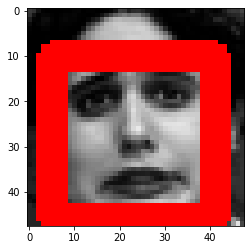

In [63]:
import matplotlib.pyplot as plt
import cv2
import face_recognition

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

def extractFace(picFile, method="recognition", debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    if method == "recognition":
        faces = face_recognition.face_locations(im_bw)
        faces = [(l,t,r-l,b-t) for t,r,b,l in faces]
    else:
        faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]    
    return cara

    
    
    
extractFace(missing[1], debug=True)

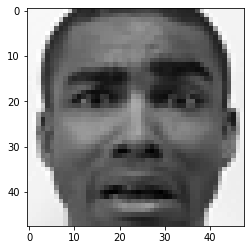

In [64]:
missingFaces = [extractFace(missingPic) for missingPic in missing]


In [65]:
missingFaces = [a for a in missingFaces if isinstance(a, np.ndarray)]

In [66]:
dim = (100,100)
missingNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in missingFaces]

In [67]:
[a.shape for a in missingNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100)]

In [68]:
# Wrap all in one fn
def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces


array([-0.10407728,  0.13288185,  0.00846941, -0.07220885, -0.16521722,
        0.00947247, -0.0185545 , -0.17986649,  0.19238622, -0.09463439,
        0.15238222,  0.03572308, -0.23389246, -0.0228281 , -0.00063472,
        0.10321674, -0.13818879, -0.13641153, -0.0377072 , -0.03417395,
        0.01695725,  0.06630534,  0.02899056,  0.03452764, -0.12979841,
       -0.26085865, -0.12827256, -0.05734205,  0.03168449,  0.01037583,
        0.00318616,  0.10806657, -0.13074887, -0.0065207 ,  0.05086222,
        0.11337928, -0.16180824, -0.11371692,  0.17297073, -0.01537612,
       -0.20261917, -0.07638423,  0.04822917,  0.22137879,  0.22241074,
       -0.07043483,  0.08391094, -0.0949067 ,  0.01284213, -0.30173883,
        0.07263558,  0.17003435, -0.02271582,  0.05944518,  0.08002213,
       -0.17897364, -0.01664084,  0.16244937, -0.15160355,  0.02680415,
        0.15652923, -0.15054969, -0.07610817, -0.06293194,  0.20325434,
        0.20482752, -0.09600876, -0.22724244,  0.23901021, -0.20

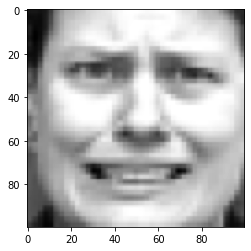

In [69]:
import face_recognition

def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None
    
extractFeatures(missingNormalized[0], debug=True)

Processing happy....
Processing contempt....
Processing fear....
Processing surprise....
Processing sadness....
Processing anger....
Processing disgust....


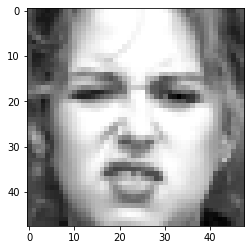

In [70]:
featurized_dataset = []
for mood,photo in pics.items():
    faces = processFiles(photo)
    print(f"Processing {mood}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "mood":mood,
            "picName":i,
            "feats":extractFeatures(face)
        })

In [71]:
df = pd.DataFrame(featurized_dataset)
df

,mood,picName,feats
0,happy,0,"[-0.0857856497168541, 0.12070325762033463, 0.0..."
1,happy,1,"[-0.11561565101146698, 0.10042160749435425, 0...."
2,happy,2,"[-0.08078758418560028, 0.0004498511552810669, ..."
3,happy,3,"[-0.1381092220544815, 0.04767180234193802, 0.1..."
4,happy,4,"[-0.05357274413108826, 0.08892941474914551, 0...."
...,...,...,...
976,disgust,172,"[-0.09853385388851166, 0.03188201040029526, -0..."
977,disgust,173,"[-0.1351788192987442, -0.017433062195777893, 0..."
978,disgust,174,"[-0.12328560650348663, 0.09153527021408081, -0..."
979,disgust,175,"[-0.2434164434671402, 0.08779747039079666, 0.0..."


In [72]:
df.mood.value_counts()

surprise    249
happy       207
disgust     177
anger       135
sadness      84
fear         75
contempt     54
Name: mood, dtype: int64

In [73]:
df = df[~df.feats.isna()]

In [74]:
df.feats.isna().value_counts()

False    978
Name: feats, dtype: int64

In [75]:
y = df.mood
X = np.vstack(df.feats)

In [76]:
print(X.shape,y.shape)

(978, 128) (978,)


In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_numeric = le.fit_transform(y)
y_numeric

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2)

In [79]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
model.predict(X_test)

array([4, 6, 6, 5, 6, 4, 5, 5, 4, 1, 6, 2, 6, 6, 4, 2, 0, 6, 2, 4, 5, 0,
       6, 0, 4, 6, 2, 3, 2, 2, 4, 6, 0, 4, 2, 1, 6, 5, 6, 2, 4, 3, 2, 4,
       0, 4, 5, 3, 0, 0, 2, 2, 4, 2, 0, 6, 2, 2, 4, 6, 6, 5, 4, 6, 4, 0,
       2, 2, 3, 4, 2, 4, 5, 0, 3, 5, 0, 6, 0, 3, 6, 0, 4, 0, 4, 6, 4, 0,
       6, 6, 6, 3, 4, 4, 0, 4, 2, 6, 6, 4, 5, 2, 3, 4, 1, 0, 6, 0, 1, 2,
       6, 2, 5, 0, 2, 2, 5, 4, 6, 4, 2, 4, 5, 2, 2, 6, 0, 2, 2, 0, 3, 0,
       2, 2, 2, 2, 4, 6, 2, 5, 6, 3, 4, 0, 4, 4, 2, 0, 2, 6, 4, 4, 4, 0,
       6, 5, 4, 0, 0, 5, 5, 5, 4, 3, 2, 4, 2, 6, 1, 2, 0, 2, 5, 6, 4, 4,
       4, 6, 6, 0, 3, 4, 4, 4, 0, 4, 2, 4, 3, 4, 2, 3, 0, 3, 6, 4])

In [81]:
y_pred = model.predict(X_test)
pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test)
})

,pred,real
0,happy,anger
1,surprise,happy
2,surprise,sadness
3,sadness,happy
4,surprise,surprise
...,...,...
191,fear,fear
192,anger,disgust
193,fear,happy
194,surprise,surprise


In [82]:
print(mean_squared_error(y_test, y_pred, squared=False))

2.481564680862887


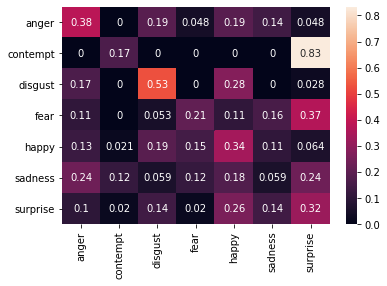

In [83]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_)

## Test

In [84]:
path = "input/FER"

faceFiles_test = [
    *glob.glob(f"../{path}/test/**/*.jpg")
]
faceFiles_test

['../input/FER/test/Happy/35837.jpg',
 '../input/FER/test/Happy/32802.jpg',
 '../input/FER/test/Happy/33249.jpg',
 '../input/FER/test/Happy/35638.jpg',
 '../input/FER/test/Happy/33507.jpg',
 '../input/FER/test/Happy/33261.jpg',
 '../input/FER/test/Happy/33275.jpg',
 '../input/FER/test/Happy/35604.jpg',
 '../input/FER/test/Happy/33513.jpg',
 '../input/FER/test/Happy/32382.jpg',
 '../input/FER/test/Happy/32427.jpg',
 '../input/FER/test/Happy/34042.jpg',
 '../input/FER/test/Happy/34724.jpg',
 '../input/FER/test/Happy/35412.jpg',
 '../input/FER/test/Happy/33711.jpg',
 '../input/FER/test/Happy/32590.jpg',
 '../input/FER/test/Happy/33842.jpg',
 '../input/FER/test/Happy/34693.jpg',
 '../input/FER/test/Happy/34644.jpg',
 '../input/FER/test/Happy/33895.jpg',
 '../input/FER/test/Happy/34650.jpg',
 '../input/FER/test/Happy/34888.jpg',
 '../input/FER/test/Happy/35566.jpg',
 '../input/FER/test/Happy/35200.jpg',
 '../input/FER/test/Happy/33665.jpg',
 '../input/FER/test/Happy/35758.jpg',
 '../input/F

In [85]:
pics = dict()
for foto in faceFiles_test:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [86]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
facestest_df =  pd.DataFrame(im, columns=["mood","photo"])
display(facestest_df)

,mood,photo
0,Happy,../input/FER/test/Happy/35837.jpg
1,Happy,../input/FER/test/Happy/32802.jpg
2,Happy,../input/FER/test/Happy/33249.jpg
3,Happy,../input/FER/test/Happy/35638.jpg
4,Happy,../input/FER/test/Happy/33507.jpg
...,...,...
3582,Disgust,../input/FER/test/Disgust/35391.jpg
3583,Disgust,../input/FER/test/Disgust/33284.jpg
3584,Disgust,../input/FER/test/Disgust/33481.jpg
3585,Disgust,../input/FER/test/Disgust/35580.jpg


In [87]:
whotest = random.choice(facestest_df.mood)
missingtest = pics[whotest]

In [88]:
facestest_df.mood.value_counts()

Happy       879
Neutral     626
Sad         594
Fear        528
Angry       490
Surprise    416
Disgust      54
Name: mood, dtype: int64

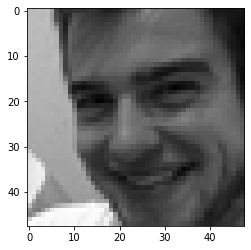

In [89]:
missingFacestest = [extractFace(missingPic) for missingPic in missingtest]



In [90]:
missingFacestest = [a for a in missingFacestest if isinstance(a, np.ndarray)]

In [91]:
dim = (100,100)
missingNormalizedtest = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in missingFacestest]

In [95]:
[a.shape for a in missingNormalizedtest]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),

Processing Happy....


Processing Sad....


Processing Fear....


Processing Surprise....


Processing Neutral....


Processing Angry....
Processing Disgust....


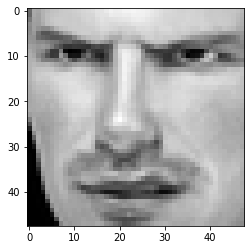

In [96]:
featurized_dataset_test = []
for mood,photo in pics.items():
    faces = processFiles(photo)
    print(f"Processing {mood}....")
    for i,face in enumerate(faces):
        featurized_dataset_test.append({
            "mood":mood,
            "picName":i,
            "feats":extractFeatures(face)
        })

In [98]:
df_test = pd.DataFrame(featurized_dataset_test)
df_test

,mood,picName,feats
0,Happy,0,"[-0.15079370141029358, 0.08521832525730133, 0...."
1,Happy,1,"[-0.04228217154741287, 0.11752933263778687, 0...."
2,Happy,2,"[-0.12527117133140564, 0.1283390074968338, 0.1..."
3,Happy,3,"[-0.07098225504159927, 0.07343848794698715, 0...."
4,Happy,4,"[-0.10159466415643692, 0.13450399041175842, -0..."
...,...,...,...
2460,Disgust,37,"[-0.07191365212202072, 0.19906409084796906, 0...."
2461,Disgust,38,"[-0.12529252469539642, 0.09248815476894379, 0...."
2462,Disgust,39,"[-0.16098885238170624, -0.0334506630897522, 0...."
2463,Disgust,40,"[-0.14776591956615448, 0.03923516720533371, 0...."


In [100]:
df_test.mood.value_counts()

Happy       690
Neutral     471
Fear        331
Angry       330
Sad         302
Surprise    299
Disgust      42
Name: mood, dtype: int64

In [103]:
df_test = df[~df.feats.isna()]

In [113]:
le = preprocessing.LabelEncoder()
df_test['mood']= le.fit_transform(df_test.mood)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
df_test

,mood,picName,feats
0,3,0,"[-0.15079370141029358, 0.08521832525730133, 0...."
1,3,1,"[-0.04228217154741287, 0.11752933263778687, 0...."
2,3,2,"[-0.12527117133140564, 0.1283390074968338, 0.1..."
3,3,3,"[-0.07098225504159927, 0.07343848794698715, 0...."
4,3,4,"[-0.10159466415643692, 0.13450399041175842, -0..."
...,...,...,...
2460,1,37,"[-0.07191365212202072, 0.19906409084796906, 0...."
2461,1,38,"[-0.12529252469539642, 0.09248815476894379, 0...."
2462,1,39,"[-0.16098885238170624, -0.0334506630897522, 0...."
2463,1,40,"[-0.14776591956615448, 0.03923516720533371, 0...."


In [125]:
from scipy.fftpack import dct
numfeats = 80
import numpy as np
def getFeats(face):
    try:
        fft = np.log10(np.abs(np.fft.fft2(face)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(face)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None

In [126]:
def whoIsTheMood(path,faceIndex=0):
    img = cv2.imread(path) 
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
    x,y,w,h = faces[faceIndex]
    face = img_bw[y:y+h,x:x+w]
    print(model.predict([getFeats(face)]))
    plt.imshow(face, cmap="gray")

Invalid face to get features


ValueError: Expected 2D array, got 1D array instead:
array=[None].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

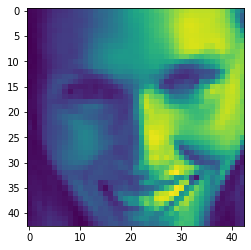

In [127]:
path = "../input/FER/test/Happy/32305.jpg"
whoIsTheMood(path)